# Matrix Profile MPlots
> Entendiendo los MPLOTS para intentar la propuesta de Eaonn Keogh
> Objetivo: Tener un tab equivalente al de los embeddings en el que en lugar de analizarse el plot de Embeddings se analice un MPlot


## Artículos de Eon Keogh en los que se describen los MPlots
- [IEEE - Matrix Profile XXVI: Mplots: Scaling Time Series Similarity Matrices to Massive Data](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=10027730) 

## Tratando de entender las Time Series similarity matrices / recurrence plots

Un Time Series Similarity Matrix o Recurrence Plot es una herramienta útil en el análisis de datos de series temporales. Permite visualizar y cuantificar las recurrencias en los datos, es decir, los momentos en los que un sistema o conjunto de datos visita un estado previo o uno muy similar en el espacio de fase.

La construcción de un Recurrence Plot implica la creación de una matriz de recurrencia, donde los ejes representan el tiempo y los puntos dentro de la matriz indican los momentos en los que los estados del sistema son similares o idénticos. En práctica, esta matriz se traduce en un gráfico donde los patrones de puntos revelan la dinámica temporal de los datos, ayudando a identificar ciclos, tendencias estacionarias, o cambios estructurales dentro de la serie temporal.

El proceso comienza con la selección de un conjunto de datos o trayectoria, seguido de la definición de un umbral de similitud para determinar qué puntos se consideran recurrencias. El resultado es una representación gráfica, a menudo utilizando caracteres ASCII o Unicode para facilitar la visualización en diferentes plataformas sin necesidad de gráficos complejos.

Este tipo de análisis es valioso en diversos campos, como la física, la biología y las finanzas, donde se estudian sistemas dinámicos y se desea comprender la naturaleza de las dependencias temporales en los datos.

Para más detalles y ejemplos de cómo generar y interpretar Recurrence Plots, puedes consultar fuentes como la documentación de RecurrenceAnalysis.


[Julia dynamics](https://juliadynamics.github.io/RecurrenceAnalysis.jl/v2.0/rplots/)
[Julia dynamics 2](https://juliadynamics.github.io/DynamicalSystems.jl/v1.5/rqa/rplots/)
--> Buscar mejores tutoriales



### Siguiendo el tutorial de pyts
[Johann Faouzi](https://pyts.readthedocs.io/en/stable/auto_examples/image/plot_dataset_rp.html)

A recurrence plot is an image obtained from a time series, representing the pairwise Euclidean distances for each value (and more generally for each trajectory) in the time series. The image can be binarized using a threshold. It is implemented as pyts.image.RecurrencePlot.

In this example, we consider the training samples of the GunPoint dataset, consisting of 50 univariate time series of length 150. The recurrence plot of each time series is independently computed and the 50 recurrence plots are plotted.

#### Install the library

In [1]:
! pip install pyts

#### Mandatory imports

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import RecurrencePlot
from pyts.datasets import load_gunpoint

#### Carga de dataset genérico: GunPoint dataset
> Contiene 50 series temporales cortas (longitud 150). 

In [3]:
from pyts.datasets import load_gunpoint
X, _, _, _ = load_gunpoint(return_X_y=True)

In [4]:
X

array([[-0.6478854 , -0.64199155, -0.63818632, ..., -0.64042873,
        -0.63866571, -0.63865722],
       [-0.64442658, -0.64540093, -0.64705511, ..., -0.6349345 ,
        -0.6344968 , -0.63159565],
       [-0.77835282, -0.77827907, -0.77715084, ..., -0.70419626,
        -0.70760524, -0.7071202 ],
       ...,
       [-0.77912617, -0.77837863, -0.7757449 , ..., -0.50500603,
        -0.50373099, -0.50438486],
       [-0.70303339, -0.70261754, -0.70250356, ..., -0.64113375,
        -0.64140622, -0.64210896],
       [-1.4357199 , -1.4322717 , -1.4329285 , ..., -1.4354619 ,
        -1.4352821 , -1.4308845 ]])

In [10]:
X.shape

(50, 150)

#### Obtenemos el plot de recurrencia para cada serie

In [5]:
rp = RecurrencePlot(threshold='point', percentage=20)
X_rp = rp.fit_transform(X)

In [9]:
print(X_rp[:1])
print(X_rp.shape)

[[[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]]
(50, 150, 150)


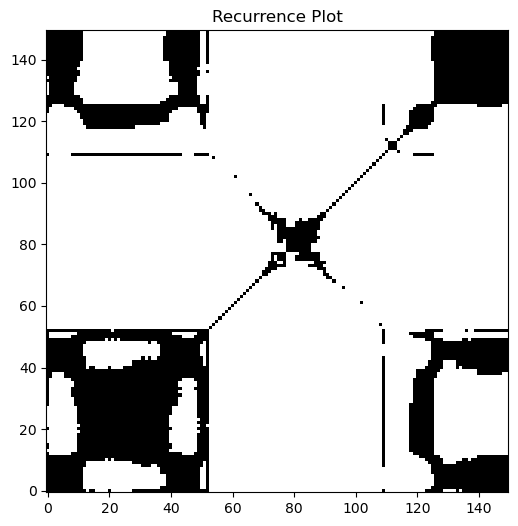

In [11]:
plt.figure(figsize=(6, 6))
plt.imshow(X_rp[0], cmap='binary', origin='lower')
plt.title('Recurrence Plot')
plt.show()